# Weather Classification Using Deep Learning

This notebook demonstrates how to build a neural network to predict the weather category based on features like precipitation, temperature, and wind speed based on the seattle-weather dataset.

---

## Importing Libraries and loading the dataset
---

In [46]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
file_path = "seattle-weather.csv" 
data = pd.read_csv(file_path)

## Step 1: Encode the Target Variable
We encode the categorical `weather` column into numerical values using `LabelEncoder`. This transforms normal string labels (e.g., "rain", "drizzle") into integer labels such as 0, 1, 2.

---

In [47]:
# Encode the weather column
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
data.head(20)

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


## Step 2: Select Our Features and Target Variable
We select the following features for training:
- `precipitation`
- `temp_max`
- `temp_min`
- `wind`

The target variable is the  label-encoded `weather` column.

---

In [36]:
# Select all other columns as features and weather column as target Y
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather_encoded']

## Step 3: Normalize the Features
To ensure that all input features contribute equally to the neural network, we ned to normalize the data, this can be done by using `MinMaxScaler`. This scales the features to a range of 0 to 1.

In [37]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Convert Weather to One-Hot Encoding
Since this is a multiclass classification problem, we need to convert the target variable into a one-hot encoded format to ensure the model predicts probabilities.

---

In [38]:
# Convert target column to one-hot encoding
y_categorical = to_categorical(y)

## Step 5: Split the dataset
Split 20% of data to use for the test set to evaluate the model's performance and 80% of the data will be used for the model to train on.

---

In [39]:
# Split 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=2)

## Step 6: Building the Neural Network Model
We construct a simple feed-forward neural network with the following:
- Input Layer: Matches the number of features from train set.
- Hidden Layers: Two dense layers with 64 and 32 neurons, respectively, both with ReLU activation.
- Dropout Layers: 2 dropout layers Added to reduce overfitting.
- Output Layer: Softmax activation to predict probabilities for each weather category.

---

In [40]:
# Build the Model
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer
    Dense(64, activation='relu'), # 1st hiden layer
    Dropout(0.3), # drop 30% of neurons in each iteration to reduce overfitting
    Dense(32, activation='relu'), # 2nd hidden layer
    Dropout(0.3), # to reduce overfitting again
    Dense(y_train.shape[1], activation='softmax')  # Softmax at output layer for multiclass classification
])

## Step 7: Compile the Model
We compile the model with the following settings:
- **Optimizer**: Adam (adaptive learning rate).
- **Loss Function**: Categorical Crossentropy (standard for multiclass classification).
- **Metrics**: Accuracy to monitor performance.

---

In [41]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 8: Train the Model
The model is trained for 50 epochs with a batch size of 16. We also validate the model on the test set during training.

---

In [42]:
# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4236 - loss: 1.4198 - val_accuracy: 0.7133 - val_loss: 1.0390
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 1.1099 - val_accuracy: 0.7235 - val_loss: 0.9579
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - loss: 1.0351 - val_accuracy: 0.7304 - val_loss: 0.8957
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6049 - loss: 1.0336 - val_accuracy: 0.7406 - val_loss: 0.8476
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.9670 - val_accuracy: 0.7201 - val_loss: 0.8206
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.9276 - val_accuracy: 0.7406 - val_loss: 0.7899
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 0.9044 - val_accuracy: 0.7611 - val_loss: 0.7618
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.8410 - val_accuracy: 0.7645 - val_loss:

## Step 9: Metrics
The model's performance is evaluated on the test set. We calculate:
- **Loss**: Quantifies the error in predictions.
- **Accuracy**: Measures the percentage of correct predictions.

---

In [43]:
# Metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5104
Test Accuracy: 0.8464


## Accuracy Plot
---

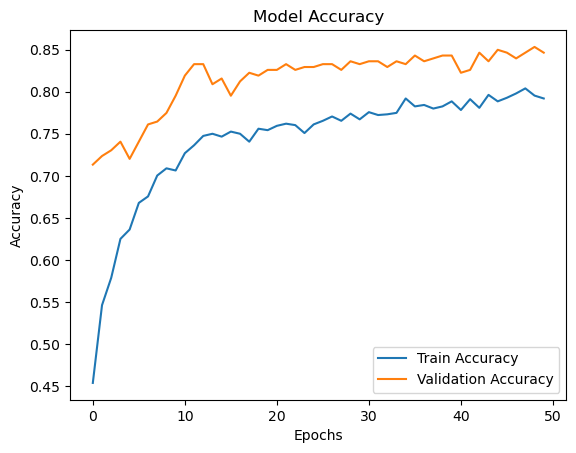

In [44]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Plot
---

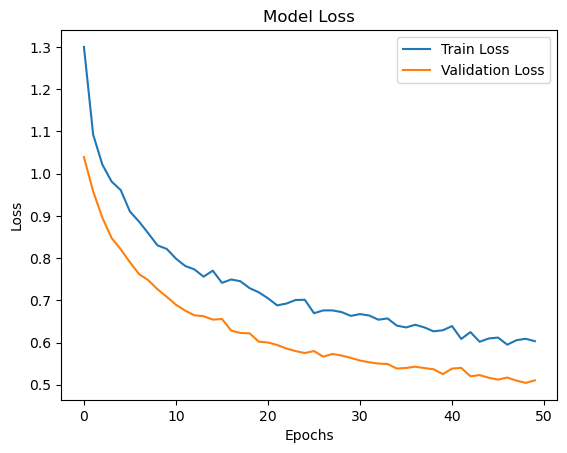

In [45]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Verification using row 15 from the dataset
*   `precipitation` = 2.5
*   `temp_max` = 1.7
*   `temp_min` = -2.8
*   `wind` = 5.0
*   `weather` = 3 (Snow)
---

In [52]:
input_data = pd.DataFrame([[2.5, 1.7, -2.8, 5.0]], columns=['precipitation', 'temp_max', 'temp_min', 'wind'])
# Preprocess the input data
input_scaled = scaler.transform(input_data)  # Using same scaler that we fitted on the training data

# Predic probabilities
predicted_probabilities = model.predict(input_scaled)

# Get the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=1)  # Returns the index of class with the highest probability

# Map the class index to the weather category
predicted_weather = label_encoder.inverse_transform(predicted_class)  # Convert the encoded label to original string labels

# Result
print("The weather is:", predicted_weather[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The weather is: snow


## Potential Next Steps
- **Hyperparameter Tuning**: Experiment with the number of layers, neurons, learning rate, etc.
- **Feature Engineering**: Add new features, such as temporal features derived from the `date` column.
- **Class Imbalance Handling**: Address imbalanced datasets using oversampling, undersampling, or class weights.
- **Add confusion matrix metric**
- **Add Precision Score Metric**
- **Add Recall Score Metric**
- **Add F1 Score Metric**
- **Look into RNN (Recurrent Neural Network):** Typically used on time series problems such as weather forecasting
- Ex: predicting weater based on last week of weather,
- Seattle dataset in this implementation is consisted of individual and indepedent weather observations for a single day, RNNs are unecessary in this case. We can attempt to use RNN by Transforming the dataset into time series format, by extracting the data and creating a sequence for RNN to train on.
- Current model is a  FFNN (Feed-Forward)
---